# Import Libraries

In [1]:
# import all libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Embedding
from keras.layers import LSTM, SimpleRNN, GRU


# Load Datset-KDD

In [2]:
df = pd.read_csv('kdd.csv',header=0)
df=df.drop(['service','flag'], axis=1)
print(df)
df['class'] = df['class'].replace(['anomaly'], 1)
df['class'] = df['class'].replace(['normal'], 0)

df['protocol_type'] = df['protocol_type'].replace(['udp'], 0)
df['protocol_type'] = df['protocol_type'].replace(['tcp'], 1)
df['protocol_type'] = df['protocol_type'].replace(['icmp'], 2)

print(df)


          id  duration protocol_type  src_bytes  dst_bytes  land  \
0          1         0           tcp          0          0     0   
1          2         0           tcp          0          0     0   
2          3         2           tcp      12983          0     0   
3          4         0          icmp         20          0     0   
4          5         1           tcp          0         15     0   
...      ...       ...           ...        ...        ...   ...   
22539  22540         0           tcp        794        333     0   
22540  22541         0           tcp        317        938     0   
22541  22542         0           tcp      54540       8314     0   
22542  22543         0           udp         42         42     0   
22543  22544         0           tcp          0          0     0   

       wrong_fragment  urgent  hot  num_failed_logins  ...  \
0                   0       0    0                  0  ...   
1                   0       0    0                  0  ... 

<ipython-input-2-398427037593>:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['class'] = df['class'].replace(['normal'], 0)
<ipython-input-2-398427037593>:9: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['protocol_type'] = df['protocol_type'].replace(['icmp'], 2)


# Assign X and Y

In [3]:
X=df.drop(columns=['class'])
y=df['class']
print(X)


          id  duration  protocol_type  src_bytes  dst_bytes  land  \
0          1         0              1          0          0     0   
1          2         0              1          0          0     0   
2          3         2              1      12983          0     0   
3          4         0              2         20          0     0   
4          5         1              1          0         15     0   
...      ...       ...            ...        ...        ...   ...   
22539  22540         0              1        794        333     0   
22540  22541         0              1        317        938     0   
22541  22542         0              1      54540       8314     0   
22542  22543         0              0         42         42     0   
22543  22544         0              1          0          0     0   

       wrong_fragment  urgent  hot  num_failed_logins  ...  dst_host_count  \
0                   0       0    0                  0  ...             255   
1              

In [4]:
names = df.head()


# Feature selection Technique

In [5]:
dtree = tree.DecisionTreeClassifier()
rfe = RFE(estimator=dtree, n_features_to_select=25)
rfe.fit(X, y)
# summarize the selection of the attributes
print(rfe.support_)
print("Rank")
print(rfe.ranking_)
print ("Features sorted by their rank:")
print (sorted(zip(map(lambda x: round(x, 4), rfe.ranking_), names)))
mm=sorted(zip(map(lambda x: round(x, 4), rfe.ranking_), names))
print(mm)
#cols=[mm[0][1],mm[1][1],mm[2][1],mm[3][1],mm[4][1],mm[5][1],mm[6][1],mm[7][1],mm[8][1],mm[9][1],mm[10][1],mm[11][1],mm[12][1],mm[13][1],mm[14][1],mm[15][1]]
cols=[mm[0][1],mm[1][1],mm[2][1],mm[3][1],mm[4][1],mm[5][1],mm[6][1],mm[7][1],mm[8][1],mm[9][1],mm[10][1],mm[11][1],mm[12][1],mm[13][1],mm[14][1],mm[15][1],mm[16][1],mm[17][1],mm[18][1],mm[19][1],mm[20][1],mm[21][1],mm[22][1],mm[23][1],mm[24][1]]
print(cols)
print(df[cols])
X=df[cols]


[ True  True  True  True  True False  True False False False  True False
 False False  True  True False False False  True False  True  True False
 False  True False  True  True  True  True  True  True  True  True  True
  True False  True  True]
Rank
[ 1  1  1  1  1  8  1  7 12  4  1 16  9 11  1  1  6  2 13  1 15  1  1  3
 10  1  5  1  1  1  1  1  1  1  1  1  1 14  1  1]
Features sorted by their rank:
[(1, 'count'), (1, 'diff_srv_rate'), (1, 'dst_bytes'), (1, 'dst_host_count'), (1, 'dst_host_diff_srv_rate'), (1, 'dst_host_rerror_rate'), (1, 'dst_host_same_src_port_rate'), (1, 'dst_host_same_srv_rate'), (1, 'dst_host_serror_rate'), (1, 'dst_host_srv_count'), (1, 'dst_host_srv_diff_host_rate'), (1, 'dst_host_srv_rerror_rate'), (1, 'duration'), (1, 'id'), (1, 'is_host_login'), (1, 'logged_in'), (1, 'num_file_creations'), (1, 'num_root'), (1, 'protocol_type'), (1, 'rerror_rate'), (1, 'same_srv_rate'), (1, 'src_bytes'), (1, 'srv_count'), (1, 'srv_diff_host_rate'), (1, 'wrong_fragment'), (2, 

# Apply Standard Scalar

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05, random_state=42)



sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)


# Feature reseduction through PCA

In [7]:
# Set the n_components=3
principal=PCA(n_components=5)
X_train=principal.fit_transform(X_train)
X_test=principal.fit_transform(X_test)

# Check the dimensions of data after PCA
print(X_train)


[[-2.45434283  0.0375113  -0.45039617  1.10379276 -0.91758617]
 [-1.80556103  1.54089792 -0.59270297  3.20507985 -1.24780065]
 [ 2.50172666 -1.07045383  1.13389436 -0.40045348  0.16710276]
 ...
 [-3.01993652 -1.81603314  1.12904181 -0.61602555  1.30313758]
 [ 0.63877917 -0.58503105 -0.56581237  1.00307522 -0.21146657]
 [-6.33794289  0.82072996  0.72504929 -0.57299931  2.68842018]]


# Build Deep Learning Mode

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
2142/2142 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.8685 - loss: 0.3753 - val_accuracy: 0.7677 - val_loss: 0.8907
Epoch 2/20
2142/2142 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8978 - loss: 0.2274 - val_accuracy: 0.7589 - val_loss: 1.1770
Epoch 3/20
2142/2142 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8975 - loss: 0.2193 - val_accuracy: 0.7668 - val_loss: 1.2258
Epoch 4/20
2142/2142 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.9078 - loss: 0.2072 - val_accuracy: 0.7730 - val_loss: 1.3058
Epoch 5/20
2142/2142 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9047 - loss: 0.2090 - val_accuracy: 0.7704 - val_loss: 1.2942
Epoch 6/20
2142/2142 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9065 - loss: 0.2119 - val_accuracy: 0.7695 - val_loss: 1.4104
Epoch 7/20
2142/2142 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9099 - loss: 0.2070 - val_accuracy: 0.7713 - val_loss: 1.3405
Epoch 8/20
2142/2142 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9126 - loss: 0.1997 - 

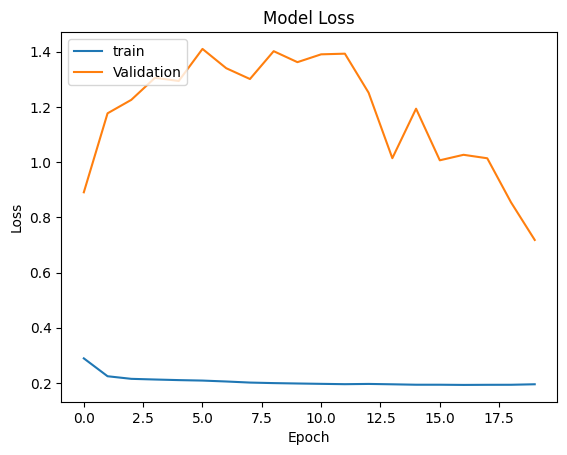

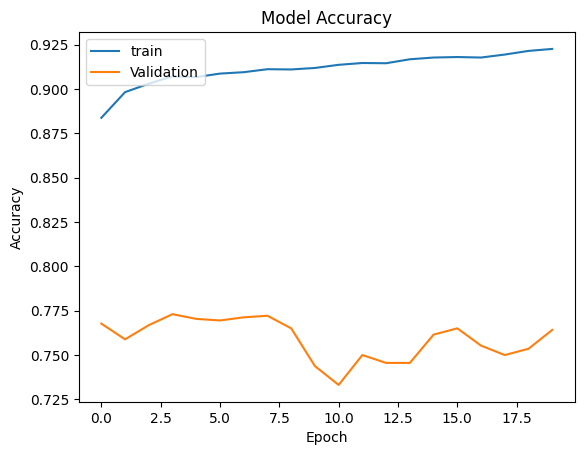

36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [8]:
model= Sequential()

model.add(Dense(16, kernel_initializer='uniform', activation='relu', input_dim=5))
model.add(Dense(14, kernel_initializer='uniform', activation='relu'))
model.add(Dense(1, activation="sigmoid"))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
hist=model.fit(X_train,y_train, epochs=20,batch_size=10,validation_data=(X_test, y_test))

#train and validation loss
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train','Validation'],loc='upper left')
plt.pause(5)
plt.show(block=False)
plt.close()

#train and validation accuracy
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train','Validation'],loc='upper left')
plt.pause(5)
plt.show(block=False)
plt.close()


y_pred=model.predict(X_test)
y_pred = [np.argmax(x) for x in y_pred]


Epoch 1/20
2142/2142 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.8607 - loss: 0.3696 - val_accuracy: 0.7668 - val_loss: 0.6617
Epoch 2/20
2142/2142 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.8902 - loss: 0.2444 - val_accuracy: 0.7553 - val_loss: 0.7342
Epoch 3/20
2142/2142 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9004 - loss: 0.2259 - val_accuracy: 0.7190 - val_loss: 0.8107
Epoch 4/20
2142/2142 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9046 - loss: 0.2234 - val_accuracy: 0.7199 - val_loss: 0.8046
Epoch 5/20
2142/2142 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9083 - loss: 0.2121 - val_accuracy: 0.7154 - val_loss: 0.7995
Epoch 6/20
2142/2142 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.9099 - loss: 0.2052 - val_accuracy: 0.7225 - val_loss: 0.8016


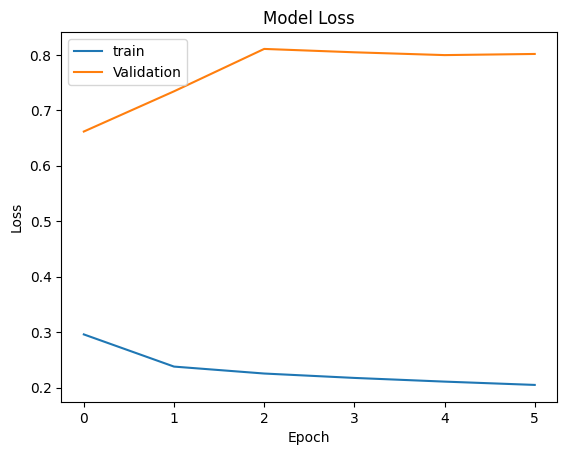

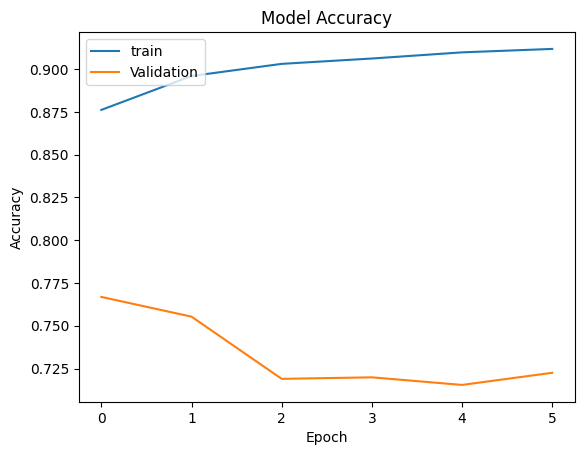

36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [9]:
from keras.callbacks import EarlyStopping

# Define your model
model = Sequential()

model.add(Dense(16, kernel_initializer='uniform', activation='relu', input_dim=5))
model.add(Dense(14, kernel_initializer='uniform', activation='relu'))
model.add(Dense(1, activation="sigmoid"))

# Compile the model
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

# Initialize EarlyStopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model with EarlyStopping
hist = model.fit(X_train, y_train, epochs=20, batch_size=10, validation_data=(X_test, y_test), callbacks=[early_stopping])

# Continue with your plotting code after training is complete
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train','Validation'],loc='upper left')

plt.pause(5)
plt.show(block=False)
plt.close()

#train and validation accuracy
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train','Validation'],loc='upper left')

plt.pause(5)
plt.show(block=False)
plt.close()


y_pred=model.predict(X_test)
y_pred = [np.argmax(x) for x in y_pred]



# Metrics computation

In [10]:
mse=mean_squared_error(y_test, y_pred)
mae=mean_absolute_error(y_test, y_pred)
r2=r2_score(y_test, y_pred)
print("MSE VALUE FOR DNN IS %f "  % mse)
print("MAE VALUE FOR DNN IS %f "  % mae)
print("R-SQUARED VALUE FOR DNN IS %f "  % r2)
rms = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE VALUE FOR DNN IS %f "  % rms)


MSE VALUE FOR DNN IS 0.570035 
MAE VALUE FOR DNN IS 0.570035 
R-SQUARED VALUE FOR DNN IS -1.325773 
RMSE VALUE FOR DNN IS 0.755007 
